## Best Pittsburgh Neighborhood: Measured By Livability

Hello! Our group decided to determine the best neighborhood in Pittsburgh by measuring the livability of each neighborhood in Pittsburgh. In this notebook, I will be looking at the crime rates of each neighborhood.

#### Why use crime rates to measure livability?

Our group defined livability as "the conditions which contribute to an increased quality of life for the people within a particular neighborhood". With that definition, it is very easy to understand how crime rates can affect quality of life. The higher the crime rate, the lower the livability. The lower the crime rate, the higher the livibility.

#### The Data

I used data from the SNAP Census 2010, specifically I used data from the Public Safety spreadsheet. You can find the SNAP Census 2010 on the Western Pennsylvania Regional Data Center website. I understand that data from 2010 is a bit old, but that was the most recent data I could find to match the metric.

In [1]:
import pandas as pd
import geopandas

Here I'm giving you a small look at the dataset. All this information is important to analyze, except for the Sector #, we don't need to use that. Now, lets see what neighborhoods we will be analyzing.

In [2]:
d = pd.read_csv("arianalopez-dataset.csv")
d.head(10)

,Neighborhood,Sector #,Population (2010),Part 1 (Major Crime) Reports (2010),Part 2 Reports (2010),Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),Murder (2010),Rape (2010),Robbery (2010),Agr. Assault (2010),Burglary (2010),Auto Theft (2010),Drug Violations (2010)
0,Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31
1,Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12
2,Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66
3,Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9
4,Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7
5,Banksville,5,"4,144",62,81,61,1.5,2.0,0,0,2,5,9,5,7
6,Bedford Dwellings,15,"1,202",42,80,38,3.5,6.7,0,0,7,8,8,2,25
7,Beechview,5,"7,974",193,303,148,2.4,3.8,1,1,7,9,47,37,29
8,Beltzhoover,6,"1,925",83,131,85,4.3,6.8,1,0,6,10,28,8,38
9,Bloomfield,12,"8,442",453,371,296,5.4,4.4,0,3,45,20,70,36,42


##### As you can see, the dataset we are analyzing has alot of different information. Lets look at all of the neighborhoods we will be analyzing.

In [3]:
data = d[["Neighborhood"]]
data.head(90)

,Neighborhood
0,Allegheny Center
1,Allegheny West
2,Allentown
3,Arlington
4,Arlington Heights
...,...
85,Upper Lawrenceville
86,West End
87,West Oakland
88,Westwood


**Now that you know the 90 different neighborhoods that I  be analyzing, lets start by looking at the data for Major Crimes Reported per 100 People.**

I decided to analyze this data specifically for a number of reasons. This data is found by analyzing the about of major crimes reported in 2010 and the population in 2010. If I only looked at the number of major crimes reported, I would have no knowledge of whether the number is good or bad, I would need to look at the population. If I looked at the population alone, I would get no valuable information for my metric. These reasons are why I will analyze the number of major crimes reported per 100 people.

In [4]:
firstDataSet = d[["Neighborhood", "Part 1 Crime per 100 Persons (2010)"]]
firstDataSet.head(90)

,Neighborhood,Part 1 Crime per 100 Persons (2010)
0,Allegheny Center,7.6
1,Allegheny West,8.2
2,Allentown,6.4
3,Arlington,2.7
4,Arlington Heights,7.8
...,...,...
85,Upper Lawrenceville,3.4
86,West End,9.1
87,West Oakland,3.1
88,Westwood,1.9


**Now we see all of the neighborhoods and the number of Part 1 Crime per 100 Persons in that neighborhood. Lets sort that data.**

In the beginning of my notebook, I mentioned that I would determine the most liveable neighborhood as a neighborhood with the lowest crime rates. That is why we are looking at the lowest values and the highest values. The lowest will determine which neighborhood is the most liveable.

In [6]:
firstDataSet.sort_values("Part 1 Crime per 100 Persons (2010)")

,Neighborhood,Part 1 Crime per 100 Persons (2010)
31,Fairywood,0.3
54,New Homestead,0.7
45,Lincoln Place,1.0
80,Summer Hill,1.2
75,Squirrel Hill North,1.3
...,...,...
16,Central Business District,21.7
56,North Shore,23.8
79,Strip District,25.2
21,Chateau,145.5


Here, we can see that the following neighborhoods have the lowest Part 1 Crime per 100 Persons: Fairywood, New Homestead, Lincoln Place, Summer Hill, Squirrel Hill North

The data also shows that the following neighborhoods have the highest value of Part 1 Crime per 100 Persons: Central Business District, North Shore, Strip District, Chataeu, South Shore

##### **Now the difference in values may not seem like that much, lets take a look at some of this data on a pie chart.**

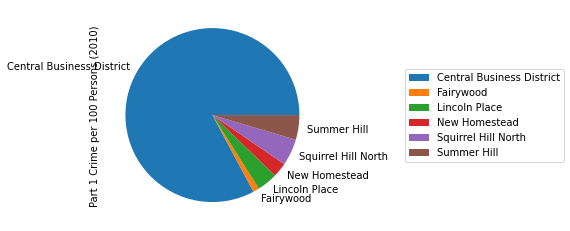

In [18]:
dataframe = pd.DataFrame({'Neighborhood': ['Fairywood', 'New Homestead', 'Lincoln Place', 'Summer Hill', 'Squirrel Hill North', 
                                           'Central Business District'],
                          'Part 1 Crime per 100 Persons (2010)': [0.3, 0.7, 1.0, 1.2, 1.3, 21.7]})
                          
dataframe.groupby(['Neighborhood']).sum().plot(kind='pie', y='Part 1 Crime per 100 Persons (2010)').legend(loc='center', bbox_to_anchor=(1.75, 0.5))

Here, we are looking at the the top 5 neighborhoods with the lowest Part 1 Crime per 100 Persons data, and also the 5th highest neighborhood with the highest Part 1 Crime per 100 Persons data. I decided to show data from the Central Business district because even though the data was only about 20 numbers off, this pie chart truly shows how significant this data is. You can only imagine what it would look like is I compared the South Shore with the 5 neighborhoods with the lowest Part 1 Crime per 100 Persons data.

**Now that we know the top 5 neighborhoods with the lowest values of Part 1 Crime per 100 Persons, lets look into those neighborhoods more.**

In [12]:
d.iloc[31]

Neighborhood                           Fairywood
Sector #                                       4
Population (2010)                          1,002
Part 1 (Major Crime) Reports (2010)            3
Part 2 Reports (2010)                          6
Other Police Reports (2010)                    9
Part 1 Crime per 100 Persons (2010)          0.3
Part 2 Crime per 100 Persons (2010)          0.6
Murder (2010)                                  0
Rape (2010)                                    0
Robbery (2010)                                 0
Agr. Assault (2010)                            0
Burglary (2010)                                1
Auto Theft (2010)                              0
Drug Violations (2010)                         0
Name: 31, dtype: object

In [13]:
d.iloc[54]

Neighborhood                           New Homestead
Sector #                                           8
Population (2010)                                990
Part 1 (Major Crime) Reports (2010)                7
Part 2 Reports (2010)                              4
Other Police Reports (2010)                        9
Part 1 Crime per 100 Persons (2010)              0.7
Part 2 Crime per 100 Persons (2010)              0.4
Murder (2010)                                      0
Rape (2010)                                        0
Robbery (2010)                                     0
Agr. Assault (2010)                                0
Burglary (2010)                                    1
Auto Theft (2010)                                  2
Drug Violations (2010)                             1
Name: 54, dtype: object

In [14]:
d.iloc[45]

Neighborhood                           Lincoln Place
Sector #                                           8
Population (2010)                              3,227
Part 1 (Major Crime) Reports (2010)               32
Part 2 Reports (2010)                             63
Other Police Reports (2010)                       33
Part 1 Crime per 100 Persons (2010)                1
Part 2 Crime per 100 Persons (2010)                2
Murder (2010)                                      0
Rape (2010)                                        0
Robbery (2010)                                     1
Agr. Assault (2010)                                3
Burglary (2010)                                   11
Auto Theft (2010)                                  2
Drug Violations (2010)                             0
Name: 45, dtype: object

In [15]:
d.iloc[80]

Neighborhood                           Summer Hill
Sector #                                         1
Population (2010)                            1,051
Part 1 (Major Crime) Reports (2010)             13
Part 2 Reports (2010)                           22
Other Police Reports (2010)                     13
Part 1 Crime per 100 Persons (2010)            1.2
Part 2 Crime per 100 Persons (2010)            2.1
Murder (2010)                                    0
Rape (2010)                                      0
Robbery (2010)                                   0
Agr. Assault (2010)                              1
Burglary (2010)                                  2
Auto Theft (2010)                                2
Drug Violations (2010)                           1
Name: 80, dtype: object

In [16]:
d.iloc[75]

Neighborhood                           Squirrel Hill North
Sector #                                                10
Population (2010)                                   11,363
Part 1 (Major Crime) Reports (2010)                    148
Part 2 Reports (2010)                                  110
Other Police Reports (2010)                            120
Part 1 Crime per 100 Persons (2010)                    1.3
Part 2 Crime per 100 Persons (2010)                      1
Murder (2010)                                            0
Rape (2010)                                              0
Robbery (2010)                                           4
Agr. Assault (2010)                                      3
Burglary (2010)                                         33
Auto Theft (2010)                                       16
Drug Violations (2010)                                  15
Name: 75, dtype: object

**Woah! This is alot of information to look at. A bar graph would help us look at this information better. Let's make one.**

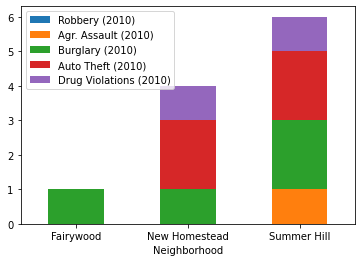

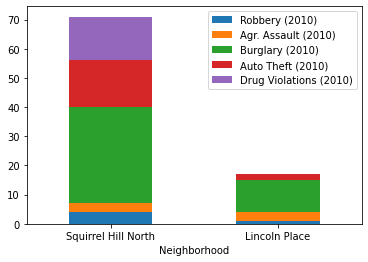

In [19]:
df = pd.DataFrame([('Fairywood', 0, 0, 1, 0, 0),
                   ('New Homestead', 0, 0, 1, 2, 1),
                   ('Summer Hill', 0, 1, 2, 2, 1)],
                  columns=('Neighborhood', 'Robbery (2010)', 'Agr. Assault (2010)', 'Burglary (2010)', 'Auto Theft (2010)', 'Drug Violations (2010)')
                 )

df.plot.bar(x='Neighborhood', stacked=True, rot=0)

df1=pd.DataFrame([ ('Squirrel Hill North', 4, 3, 33, 16, 15),
                   ('Lincoln Place', 1, 3, 11, 2, 0)],
                 columns=('Neighborhood', 'Robbery (2010)', 'Agr. Assault (2010)', 'Burglary (2010)', 'Auto Theft (2010)', 'Drug Violations (2010)')
                 )
df1.plot.bar(x='Neighborhood', stacked=True, rot=0)



From this data, we can see that Fairywood has the lowest numbers when compared to the other neighborhoods. Squirrel Hill North has signicantly more burglaries, auto thefts, and drug violations when compared to the other neighborhoods.

## **Conclusion**

After analyzing the data from the SNAP 2010 Census, I have determined that Fairywood is the most liveable neighborhood in Pittsburgh. I came to this concluion as Fairywood had zero reports of robberies/aggrivated assaults/auto thefts/drug violations, only one report of burglary, and the lowest number of Major Crimes Reported per 100 Persons.

Starting with the second most liveable neighborhood, I would rank the other neighborhoods as the following: Summer Hill, New Homestead, Lincoln Place, Squirrel Hill North